# 데이터 분석

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up the plotting style
plt.style.use('default')
sns.set_palette("deep")

# Loading the dataset
df = pd.read_csv('train.csv')

# Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Summary Statistics for Numerical Columns
numerical_cols = ['Age', 'Nodule_Size', 'TSH_Result', 'T4_Result', 'T3_Result']
print("\nSummary Statistics for Numerical Columns:\n", df[numerical_cols].describe())

# Summary for Categorical Columns
categorical_cols = ['Gender', 'Country', 'Race', 'Family_Background', 
                   'Radiation_History', 'Iodine_Deficiency', 'Smoke', 
                   'Weight_Risk', 'Diabetes', 'Cancer']
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()

# Distribution of Numerical Features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()
for idx, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
axes[-1].axis('off')  # Hide unused subplot
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.close()

# Cancer Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cancer', data=df)
plt.title('Distribution of Cancer Cases (0: No, 1: Yes)')
plt.savefig('cancer_distribution.png')
plt.close()

# Age vs Cancer
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer', y='Age', data=df)
plt.title('Age Distribution by Cancer Status')
plt.savefig('age_vs_cancer.png')
plt.close()

# Categorical Features vs Cancer
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()
for idx, col in enumerate(categorical_cols[:-1]):  # Excluding Cancer
    sns.countplot(x=col, hue='Cancer', data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs Cancer')
    axes[idx].tick_params(axis='x', rotation=45)
for ax in axes[idx+1:]:
    ax.axis('off')
plt.tight_layout()
plt.savefig('categorical_vs_cancer.png')
plt.close()

# Nodule Size vs Cancer
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer', y='Nodule_Size', data=df)
plt.title('Nodule Size by Cancer Status')
plt.savefig('nodule_size_vs_cancer.png')
plt.close()

# Thyroid Function Tests vs Cancer
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['TSH_Result', 'T4_Result', 'T3_Result']):
    sns.boxplot(x='Cancer', y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} by Cancer Status')
plt.tight_layout()
plt.savefig('thyroid_tests_vs_cancer.png')
plt.close()

# Interesting Fact: Checking for potential age-related patterns
young_cancer = df[(df['Age'] < 30) & (df['Cancer'] == 1)].shape[0]
total_young = df[df['Age'] < 30].shape[0]
print(f"\nInteresting Fact: {young_cancer/total_young*100:.2f}% of patients under 30 have cancer.")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Dataset Shape: (87159, 16)

Column Names: ['ID', 'Age', 'Gender', 'Country', 'Race', 'Family_Background', 'Radiation_History', 'Iodine_Deficiency', 'Smoke', 'Weight_Risk', 'Diabetes', 'Nodule_Size', 'TSH_Result', 'T4_Result', 'T3_Result', 'Cancer']

Data Types:
 ID                    object
Age                    int64
Gender                object
Country               object
Race                  object
Family_Background     object
Radiation_History     object
Iodine_Deficiency     object
Smoke                 object
Weight_Risk           object
Diabetes              object
Nodule_Size          float64
TSH_Result           float64
T4_Result            float64
T3_Result            float64
Cancer                 int64
dtype: object

Missing Values:
 ID                   0
Age                  0
Gender               0
Country           

## 범주형 데이터별 갑상선암 양성 비율 분석

/var/folders/bj/ljbr3v1s4vg1cjjtmtss7w3r0000gn/T/ipykernel_29228/3325976487.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Cancer_Probability', data=cancer_prob, ax=ax, palette='viridis')
/var/folders/bj/ljbr3v1s4vg1cjjtmtss7w3r0000gn/T/ipykernel_29228/3325976487.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Cancer_Probability', data=cancer_prob, ax=ax, palette='viridis')
/var/folders/bj/ljbr3v1s4vg1cjjtmtss7w3r0000gn/T/ipykernel_29228/3325976487.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='

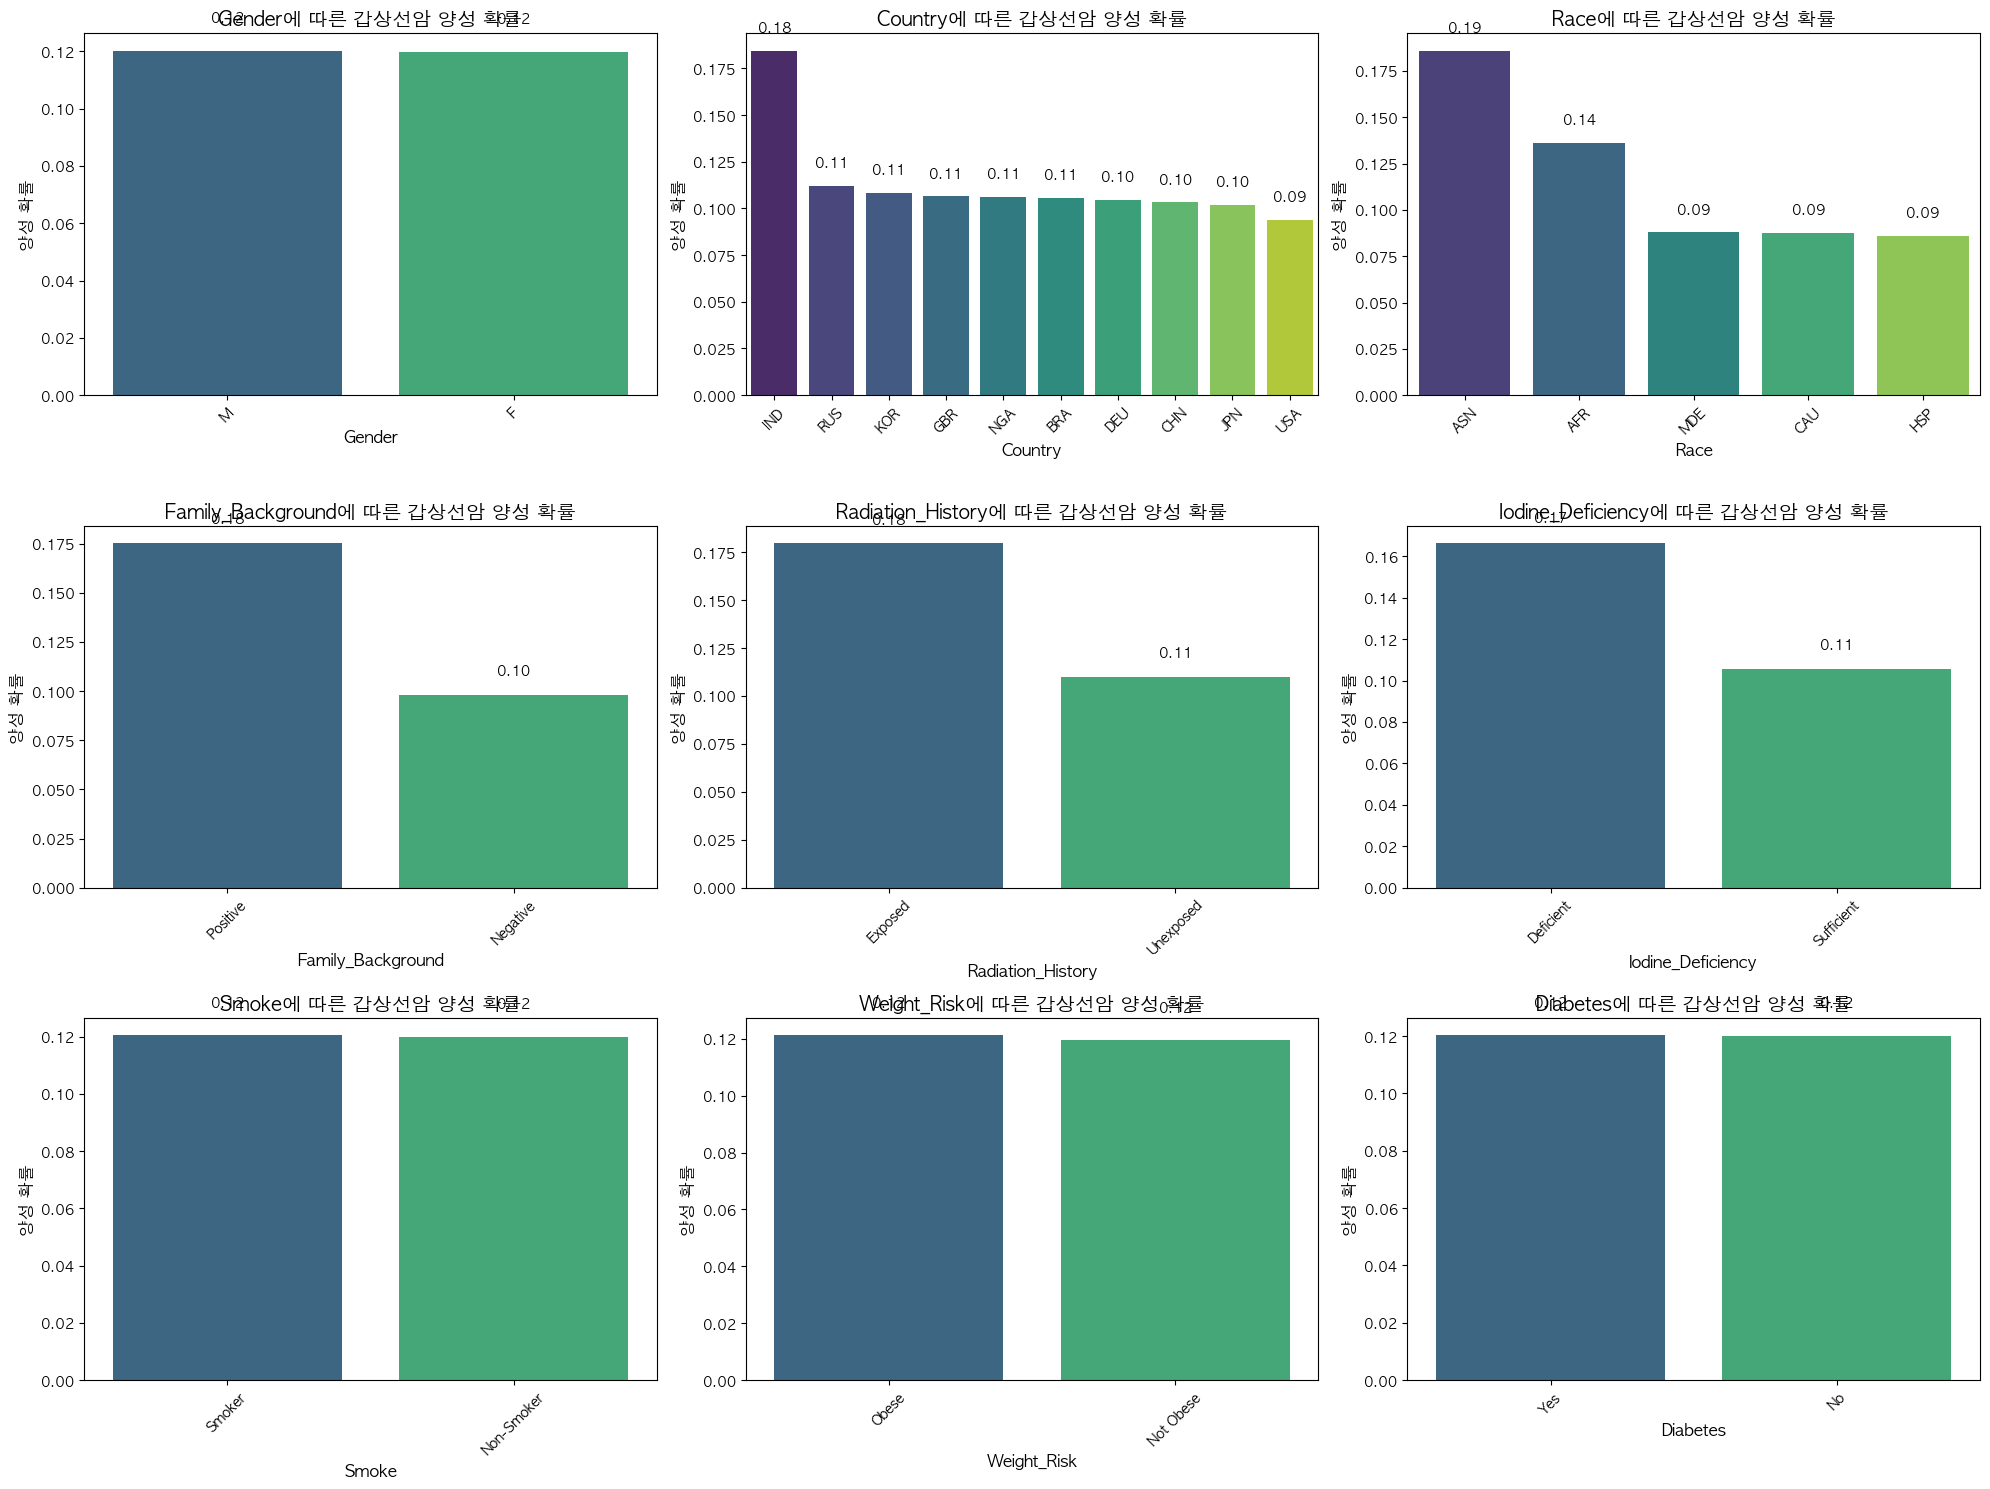

범주형 변수별 갑상선암 발생과의 통계적 유의성 검정 (카이제곱 검정):
Gender: chi2 = 0.0305, p-value = 0.8613 (유의하지 않음)
Country: chi2 = 801.6794, p-value = 0.0000 (**유의함**)
Race: chi2 = 1384.2394, p-value = 0.0000 (**유의함**)
Family_Background: chi2 = 1000.5772, p-value = 0.0000 (**유의함**)
Radiation_History: chi2 = 488.6179, p-value = 0.0000 (**유의함**)
Iodine_Deficiency: chi2 = 556.3569, p-value = 0.0000 (**유의함**)
Smoke: chi2 = 0.0346, p-value = 0.8524 (유의하지 않음)
Weight_Risk: chi2 = 0.4355, p-value = 0.5093 (유의하지 않음)
Diabetes: chi2 = 0.0052, p-value = 0.9427 (유의하지 않음)


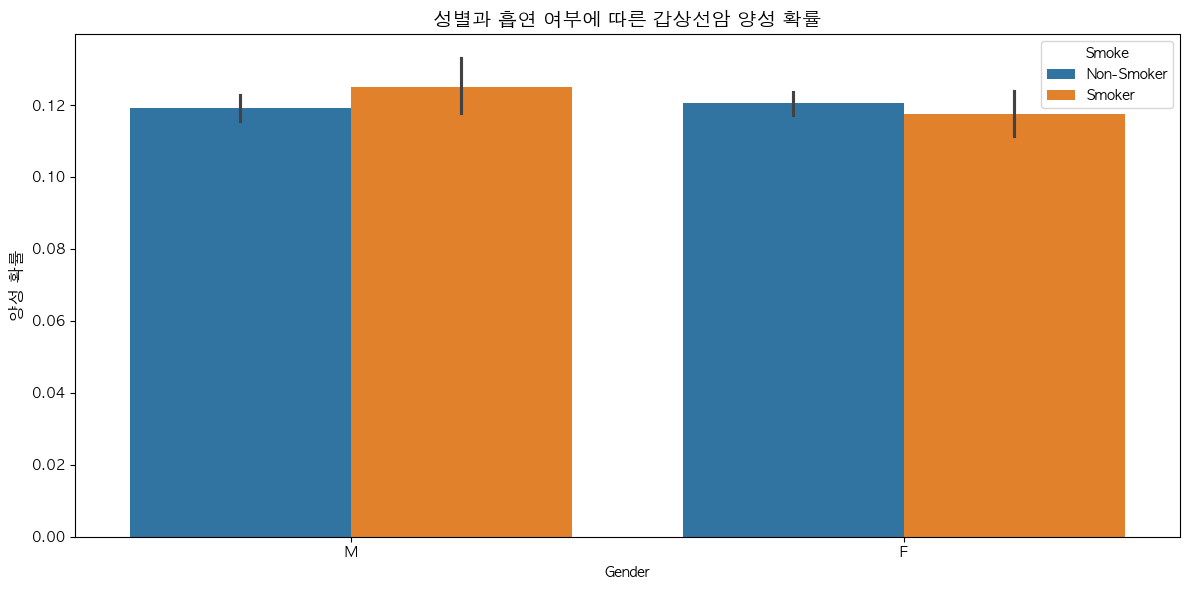

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터 로드
df = pd.read_csv('../train.csv')

# 범주형 변수 리스트
categorical_cols = ['Gender', 'Country', 'Race', 'Family_Background', 
                   'Radiation_History', 'Iodine_Deficiency', 'Smoke', 
                   'Weight_Risk', 'Diabetes']

# 결과를 저장할 그림 설정
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

# 각 범주형 변수에 대해 Cancer=1 확률 계산 및 시각화
for i, col in enumerate(categorical_cols):
    # 각 카테고리별 Cancer=1 확률 계산
    cancer_prob = df.groupby(col)['Cancer'].mean().reset_index()
    cancer_prob.columns = [col, 'Cancer_Probability']
    
    # 확률에 따라 정렬 (선택 사항)
    cancer_prob = cancer_prob.sort_values('Cancer_Probability', ascending=False)
    
    # 시각화
    ax = axes[i]
    sns.barplot(x=col, y='Cancer_Probability', data=cancer_prob, ax=ax, palette='viridis')
    ax.set_title(f'{col}에 따른 갑상선암 양성 확률', fontsize=14)
    ax.set_ylabel('양성 확률', fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # 각 막대 위에 확률값 표시
    for j, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('categorical_cancer_probability.png')
plt.show()

# 추가: 통계적 유의성 검정 (카이제곱 검정)
from scipy.stats import chi2_contingency

print("범주형 변수별 갑상선암 발생과의 통계적 유의성 검정 (카이제곱 검정):")
print("="*80)
for col in categorical_cols:
    # 교차표 생성
    contingency_table = pd.crosstab(df[col], df['Cancer'])
    
    # 카이제곱 검정 수행
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # 결과 출력
    print(f"{col}: chi2 = {chi2:.4f}, p-value = {p:.4f}", 
          "(**유의함**)" if p < 0.05 else "(유의하지 않음)")

# 범주형 변수 간의 복합적인 영향을 시각화하는 추가 분석
# 예: Gender와 Smoke의 조합에 따른 Cancer 확률
plt.figure(figsize=(12, 6))
gender_smoke_cancer = df.groupby(['Gender', 'Smoke'])['Cancer'].mean().reset_index()
sns.barplot(x='Gender', y='Cancer', hue='Smoke', data=df)
plt.title('성별과 흡연 여부에 따른 갑상선암 양성 확률', fontsize=14)
plt.ylabel('양성 확률', fontsize=12)
plt.tight_layout()
plt.savefig('gender_smoke_cancer_probability.png')
plt.show()